# BAGLE Calculator (bagle_tut)


In [1]:
%matplotlib widget
import ipywidgets as widgets
from IPython.display import clear_output

import sys
sys.path.append('src/')
from src.bagle import model

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

print(widgets.__version__)

7.7.2


In [2]:
ipython = get_ipython()

def hide_traceback(exc_tuple=None, filename=None, tb_offset=None,
                   exception_only=False, running_compiled_code=False):
    etype, value, tb = sys.exc_info()
    return ipython._showtraceback(etype, value, ipython.InteractiveTB.get_exception_only(etype, value))

ipython.showtraceback = hide_traceback

In [3]:
mL = 10.0  # msun
t0 = 57000.00
xS0 = np.array([0.000, 0.000])
# beta = -0.4 # mas
beta = 1.4  # mas
muS = np.array([8.0, 0.0])
# muL = np.array([-7.0, 0.00])
muL = np.array([0.00, 0.00])
dL = 4000.0
dS = 8000.0
b_sff = 1.0
mag_src = 19.0

event1 = model.PSPL_PhotAstrom_noPar_Param1(mL,t0,beta,dL,dL / dS,xS0[0],xS0[1],muL[0],muL[1],muS[0],muS[1],[b_sff],[mag_src])

[1.1602035      -inf]
[3.19058249 0.        ]
PSPL_PhotAstromParam1


/var/folders/y3/pw5z_x614vd0zsyc67bpgm340000gn/T/ipykernel_11959/1390625048.py:1: RuntimeWarning: divide by zero encountered in log
  print(np.log(event1.thetaE))


Output()

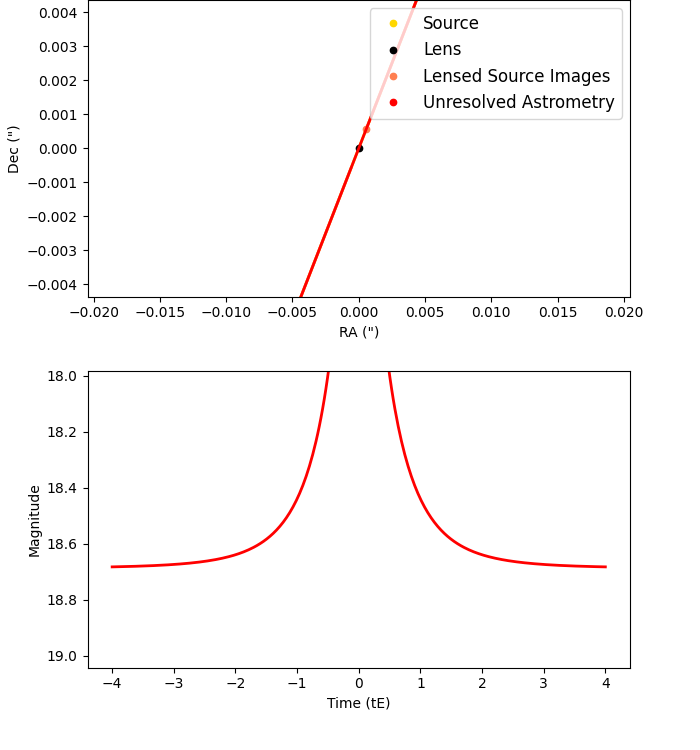

In [4]:
print(np.log(event1.thetaE))
print(event1.thetaE)
sliders_ui, sliders_out = event1.interact(4, 150, [7,7], 3)
display(sliders_ui, sliders_out)